In [101]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn import datasets
from sklearn import svm

In [102]:
import warnings
warnings.filterwarnings('ignore')

In [103]:
something_data = pd.read_csv('/content/heart123.csv')

In [104]:
something_data.head()

,age,cp,exang,thal,target
0,52,0,0,3,0
1,53,0,1,3,0
2,70,0,1,3,0
3,61,0,0,3,0
4,62,0,0,2,0


In [105]:
something_data.tail()

,age,cp,exang,thal,target
1119,24,2,0,3,0
1120,24,1,0,3,0
1121,24,3,1,1,1
1122,24,2,1,1,1
1123,24,2,1,1,1


In [106]:
something_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1124 entries, 0 to 1123
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     1124 non-null   int64
 1   cp      1124 non-null   int64
 2   exang   1124 non-null   int64
 3   thal    1124 non-null   int64
 4   target  1124 non-null   int64
dtypes: int64(5)
memory usage: 44.0 KB


In [107]:
something_data.isnull().sum()

age       0
cp        0
exang     0
thal      0
target    0
dtype: int64

In [108]:
something_data.describe()

,age,cp,exang,thal,target
count,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000
mean,51.705516,0.962633,0.351423,2.317616,0.512456
std,12.371423,1.041623,0.477627,0.634151,0.500067
min,21.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,0.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,2.000000,1.000000,3.000000,1.000000
max,77.000000,3.000000,1.000000,3.000000,1.000000


In [109]:
something_data['target'].value_counts()

1    576
0    548
Name: target, dtype: int64

In [110]:
X = something_data.drop(columns='target', axis=1)
Y = something_data['target']

In [111]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=3)

In [112]:
print(X.shape, X_train.shape, X_test.shape)

(1124, 4) (899, 4) (225, 4)


In [113]:
model = LogisticRegression()

In [114]:
model.fit(X_train, Y_train)

LogisticRegression()

In [115]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [116]:
print("accuracy on training data", training_data_accuracy)

accuracy on training data 0.7664071190211346


In [117]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [118]:
print("accuracy on test data", test_data_accuracy)

accuracy on test data 0.7422222222222222


In [119]:
from sklearn.metrics import confusion_matrix

In [120]:
cf_matrix = confusion_matrix(Y_test, X_test_prediction)

print(cf_matrix)

[[76 34]
 [24 91]]


In [121]:
tn, fp, fn, tp = cf_matrix.ravel()
print(tn,fp,fn,tp)

76 34 24 91


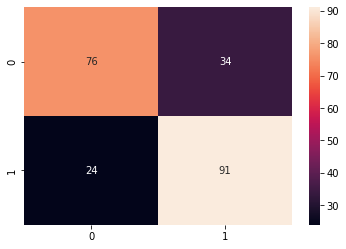

In [122]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [123]:
input_data = (23, 3, 1, 1)

input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
  print('you just might be lucky')
else:
  print('you should get yourself checked')

[1]
you should get yourself checked


In [124]:
import pickle

In [125]:
filename = 'heart123.sav'
pickle.dump(model, open(filename, 'wb'))